In [1]:
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

In [2]:
sys.path.append('../../')
from consensus_variables import *

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
plots_dir = "./plots"

In [5]:
cord_blood_mutrates = pd.read_table("./data/mutation_rates.tsv").reset_index(drop = True)

In [6]:
cord_blood_mutrates

,sample,N_mut,N_mut_corrected,DEPTH,experiment,patient_id,mutrate_observed,mutrate_CI_high,mutrate_CI_low,Muts_per_cell
0,CBL_0001_BLO_01,35,43.196159,702788114,tws,CBL_0001,6.146399e-08,8.272895e-08,4.566505e-08,351.737061
1,CBL_0003_BLO_01,26,33.889806,1084821067,tws,CBL_0003,3.124000e-08,4.367633e-08,2.234477e-08,178.775652
2,CBL_0005_BLO_01,47,57.865717,1014269889,tws,CBL_0005,5.705160e-08,7.376637e-08,4.412424e-08,326.486488
3,PD48442_cordblood_nanoseqv2,41,38.431317,2799554062,Nanoseq_Sanger,PD48442,1.372766e-08,1.880776e-08,1.001973e-08,78.558614
4,PD47269_cordblood_nanoseqv2,26,28.298447,2003725667,Nanoseq_Sanger,PD47269,1.412291e-08,2.037250e-08,9.790490e-09,80.820541


In [7]:
cord_blood_mutrates = cord_blood_mutrates[['sample', 'experiment', 'patient_id', 'mutrate_observed', 'mutrate_CI_high', 'mutrate_CI_low']].copy()
cord_blood_mutrates['experiment'] = cord_blood_mutrates['experiment'].str.replace("tws", "TwinStrand")

In [8]:
all_mutrates = pd.read_table(f"{deepcsa_run_dir}/mutrate/all_mutrates.tsv")
all_samples_mutrates = all_mutrates[(all_mutrates["REGIONS"] == "all") &
                                    (all_mutrates["MUTTYPES"] == "SNV") &
                                    (all_mutrates["GENE"] == "ALL_GENES") &
                                    (all_mutrates["SAMPLE_ID"] == "all_samples")
                                    ]
all_samples_mutrate = all_samples_mutrates["MUTRATE_MB"].item() / 1e6
all_samples_mutrate

8.281592254165522e-07

In [9]:
cord_blood_mutrates.head()

,sample,experiment,patient_id,mutrate_observed,mutrate_CI_high,mutrate_CI_low
0,CBL_0001_BLO_01,TwinStrand,CBL_0001,6.146399e-08,8.272895e-08,4.566505e-08
1,CBL_0003_BLO_01,TwinStrand,CBL_0003,3.124000e-08,4.367633e-08,2.234477e-08
2,CBL_0005_BLO_01,TwinStrand,CBL_0005,5.705160e-08,7.376637e-08,4.412424e-08
3,PD48442_cordblood_nanoseqv2,Nanoseq_Sanger,PD48442,1.372766e-08,1.880776e-08,1.001973e-08
4,PD47269_cordblood_nanoseqv2,Nanoseq_Sanger,PD47269,1.412291e-08,2.037250e-08,9.790490e-09


In [10]:
cord_blood_mutrates.loc[5,['sample', 'experiment', 'patient_id', 'mutrate_observed']] = ["Bladder", "BladderDNA_TwinStrand", "Bladder", all_samples_mutrate]

In [11]:
cord_blood_mutrates

,sample,experiment,patient_id,mutrate_observed,mutrate_CI_high,mutrate_CI_low
0,CBL_0001_BLO_01,TwinStrand,CBL_0001,6.146399e-08,8.272895e-08,4.566505e-08
1,CBL_0003_BLO_01,TwinStrand,CBL_0003,3.124000e-08,4.367633e-08,2.234477e-08
2,CBL_0005_BLO_01,TwinStrand,CBL_0005,5.705160e-08,7.376637e-08,4.412424e-08
3,PD48442_cordblood_nanoseqv2,Nanoseq_Sanger,PD48442,1.372766e-08,1.880776e-08,1.001973e-08
4,PD47269_cordblood_nanoseqv2,Nanoseq_Sanger,PD47269,1.412291e-08,2.037250e-08,9.790490e-09
5,Bladder,BladderDNA_TwinStrand,Bladder,8.281592e-07,NaN,NaN


In [12]:
cord_blood_mutrates["patient_id"].values

array(['CBL_0001', 'CBL_0003', 'CBL_0005', 'PD48442', 'PD47269',
       'Bladder'], dtype=object)

In [13]:
data = cord_blood_mutrates

In [14]:
# sampless_list = ['PD47269', 'PD48442', 'CBL_0001', 'CBL_0003', 'CBL_0005', "Bladder"]

# # Calculate error bars
# data['yerr_low'] = data['mutrate_observed'] - data['mutrate_CI_low']
# data['yerr_high'] = data['mutrate_CI_high'] - data['mutrate_observed']

# # Sort by experiment for consistent plotting
# data = data.sort_values('experiment')

# # Plot
# plt.figure(figsize=(5, 4))
# ax = sns.barplot(
#     data=data,
#     x='patient_id',
#     y='mutrate_observed',
#     hue='experiment',
#     palette='muted',
#     dodge=False,
#     errorbar=None,
#     order=sampless_list,
#     hue_order = ["Nanoseq_Sanger", "TwinStrand", ", ", "BladderDNA_TwinStrand"]
# )

# # Add error bars manually
# for idx, sample in enumerate(sampless_list):
#     row = data[data["patient_id"] == sample].iloc[0, :]
#     ax.errorbar(
#         x=idx,
#         y=row['mutrate_observed'],
#         yerr=[[row['yerr_low']], [row['yerr_high']]],
#         fmt='none',
#         ecolor='black',
#         capsize=3
#     )

# # Add mutation rate values above each bar
# for idx, sample in enumerate(sampless_list):
#     row = data[data["patient_id"] == sample].iloc[0, :]
#     mutrate = row['mutrate_observed']
#     ax.text(
#         idx, 
#         mutrate + 0.2e-8 if sample == "Bladder" else mutrate + 4e-8,  # adjust this offset to move the text higher or lower
#         f'{mutrate:.1e}', 
#         ha='center', 
#         va='bottom', 
#         fontsize=8, 
#         color='black'
#     )


    
# # Set y-axis to scientific notation
# formatter = ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-2, 2))
# ax.yaxis.set_major_formatter(formatter)

# # Remove top and right spines
# sns.despine(ax=ax, left=True, top=True, right=True)

# # Customize
# ax.set_ylabel("")
# ax.set_title("Comparison with normal bladder\nurothelium mutation rate", fontsize = 13)
# ax.set_xlabel("Samples", fontsize = 11)
# ax.set_xticks(range(len(sampless_list)))
# ax.set_xticklabels(sampless_list, fontsize = 10, rotation=45)
# ax.set_yticks([x / 1e7 for x in [0, 1, 2, 4, 6, 8] ])
# ax.set_yticklabels(['', '', '2', '4', '6', '8'])

# # ax.set_ylim(0, 1e-7)
# plt.tight_layout()
# plt.legend(title="Duplex sequencing technology", frameon = False).remove()
# plt.savefig("plots/withbladder.png")
# plt.show()


In [15]:
# sampless_list = ['PD47269', 'PD48442', 'CBL_0001', 'CBL_0003', 'CBL_0005', "Bladder"]

# # Calculate error bars
# data['yerr_low'] = data['mutrate_observed'] - data['mutrate_CI_low']
# data['yerr_high'] = data['mutrate_CI_high'] - data['mutrate_observed']

# # Sort by experiment for consistent plotting
# data = data.sort_values('experiment')

# # Plot
# plt.figure(figsize=(5, 4))
# ax = sns.barplot(
#     data=data,
#     x='patient_id',
#     y='mutrate_observed',
#     hue='experiment',
#     palette='muted',
#     dodge=False,
#     errorbar=None,
#     order=sampless_list
# )

# # Add error bars manually
# for idx, sample in enumerate(sampless_list):
#     row = data[data["patient_id"] == sample].iloc[0, :]
#     ax.errorbar(
#         x=idx,
#         y=row['mutrate_observed'],
#         yerr=[[row['yerr_low']], [row['yerr_high']]],
#         fmt='none',
#         ecolor='black',
#         capsize=3
#     )

# # Set y-axis to scientific notation
# formatter = ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-2, 2))
# ax.yaxis.set_major_formatter(formatter)

# # Remove top and right spines
# sns.despine(ax=ax, left=True, top=True, right=True)

# # Customize
# ax.set_ylabel("")
# ax.set_title("Comparison with normal bladder\nurothelium mutation rate", fontsize = 13)
# ax.set_xlabel("Samples", fontsize = 11)
# ax.set_xticks(range(len(sampless_list)))
# ax.set_xticklabels(sampless_list, fontsize = 10, rotation=45)
# ax.set_yticks([x / 1e7 for x in [0, 1, 2, 4, 6, 8] ])
# ax.set_yticklabels(['', '', '2', '4', '6', '8'])

# # ax.set_ylim(0, 1e-7)
# plt.tight_layout()
# plt.legend(title="Duplex sequencing technology", frameon = False).remove()
# # plt.savefig("plots/withbladder.png")
# plt.show()


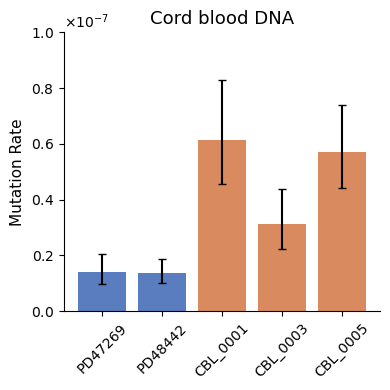

In [ ]:
# # Sample data (replace this with your actual DataFrame)
# data = cord_blood_mutrates
# sampless_list = ['PD47269', 'PD48442', 'CBL_0001', 'CBL_0003', 'CBL_0005']

# # Calculate error bars
# data['yerr_low'] = data['mutrate_observed'] - data['mutrate_CI_low']
# data['yerr_high'] = data['mutrate_CI_high'] - data['mutrate_observed']

# # Sort by experiment for consistent plotting
# data = data.sort_values('experiment')

# # Plot
# plt.figure(figsize=(4, 4))
# ax = sns.barplot(
#     data=data,
#     x='patient_id',
#     y='mutrate_observed',
#     hue='experiment',
#     hue_order = ["Nanoseq_Sanger", "TwinStrand", ", ", "BladderDNA_TwinStrand"],
#     palette='muted',
#     dodge=False,
#     errorbar=None,
#     order=sampless_list,
#     legend = False
# )

# # Add error bars manually
# for idx, sample in enumerate(sampless_list):
#     row = data[data["patient_id"] == sample].iloc[0, :]
#     ax.errorbar(
#         x=idx,
#         y=row['mutrate_observed'],
#         yerr=[[row['yerr_low']], [row['yerr_high']]],
#         fmt='none',
#         ecolor='black',
#         capsize=3
#     )

# # Set y-axis to scientific notation
# formatter = ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-2, 2))
# ax.yaxis.set_major_formatter(formatter)

# # Remove top and right spines
# sns.despine(ax=ax, top=True, right=True)

# # Customize
# ax.set_ylabel("Mutation Rate", fontsize = 11)
# ax.set_xlabel("", fontsize = 11)
# ax.set_title("Cord blood DNA", fontsize = 13)
# ax.set_xticks(range(len(sampless_list)))
# ax.set_xticklabels(sampless_list, fontsize = 10, rotation=45)
# ax.set_ylim(0, 1e-7)
# # ax.set_yticklabels(ax.get_yticks(), fontsize = 11)
# plt.tight_layout()
# # plt.legend(title="Duplex sequencing technology", frameon = False, bbox_to_anchor = (1.1, 1.1))
# plt.savefig("plots/ExtendedFig2a_left.png", dpi = 300)
# plt.show()


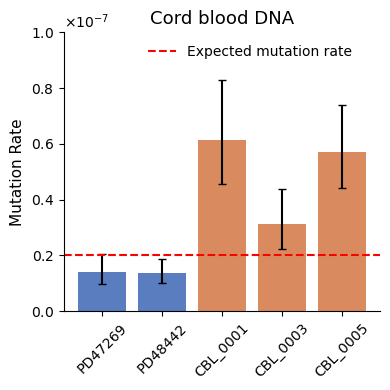

In [25]:
# Sample data (replace this with your actual DataFrame)
data = cord_blood_mutrates
sampless_list = ['PD47269', 'PD48442', 'CBL_0001', 'CBL_0003', 'CBL_0005']

# Calculate error bars
data['yerr_low'] = data['mutrate_observed'] - data['mutrate_CI_low']
data['yerr_high'] = data['mutrate_CI_high'] - data['mutrate_observed']

# Sort by experiment for consistent plotting
data = data.sort_values('experiment')

# Plot
plt.figure(figsize=(4, 4))
ax = sns.barplot(
    data=data,
    x='patient_id',
    y='mutrate_observed',
    hue='experiment',
    hue_order = ["Nanoseq_Sanger", "TwinStrand", ", ", "BladderDNA_TwinStrand"],
    palette='muted',
    dodge=False,
    errorbar=None,
    order=sampless_list,
    legend = False
)

# Add error bars manually
for idx, sample in enumerate(sampless_list):
    row = data[data["patient_id"] == sample].iloc[0, :]
    ax.errorbar(
        x=idx,
        y=row['mutrate_observed'],
        yerr=[[row['yerr_low']], [row['yerr_high']]],
        fmt='none',
        ecolor='black',
        capsize=3
    )

ax.axhline(y=2e-8, color='red', linestyle='--', label='Expected mutation rate')


# Set y-axis to scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Remove top and right spines
sns.despine(ax=ax, top=True, right=True)

# Customize
ax.set_ylabel("Mutation Rate", fontsize = 11)
ax.set_xlabel("", fontsize = 11)
ax.set_title("Cord blood DNA", fontsize = 13)
ax.set_xticks(range(len(sampless_list)))
ax.set_xticklabels(sampless_list, fontsize = 10, rotation=45)
ax.set_ylim(0, 1e-7)
# ax.set_yticklabels(ax.get_yticks(), fontsize = 11)
plt.tight_layout()
plt.legend(title="", frameon = False, bbox_to_anchor = (0.95, 1))
plt.savefig("plots/ExtendedFig2a_left_expected.png", dpi = 300)
plt.show()


In [17]:
# 2x10-8 and 3.5x10-8

## Plot technology error rates vs bladder mutation rate

In [18]:
error_rates = cord_blood_mutrates.copy()

In [19]:
error_ratessss_tws = (cord_blood_mutrates[cord_blood_mutrates["experiment"] == "TwinStrand"]["mutrate_observed"].values - 2e-8)
error_ratessss_tws.sort()
error_ratessss_tws

array([1.12399957e-08, 3.70515971e-08, 4.14639865e-08])

In [20]:
error_rates.iloc[5:,:].reset_index(drop = True)

,sample,experiment,patient_id,mutrate_observed,mutrate_CI_high,mutrate_CI_low,yerr_low,yerr_high
0,Bladder,BladderDNA_TwinStrand,Bladder,8.281592e-07,NaN,NaN,NaN,NaN


In [21]:
# 6.1x10-8, 3.1x10-8 and 5.7x10-8

In [22]:
error_rates.loc[6, ['experiment', 'patient_id', 'mutrate_observed']] = ["Nanoseq_Sanger", "Nanoseq_Sanger", 5e-9]

In [23]:
error_rates.loc[7, ['experiment', 'patient_id', 'mutrate_observed', 'mutrate_CI_high', 'mutrate_CI_low']] = ["TwinStrand",
                                                                                                             "TwinStrand\nCord blood",
                                                                                                             error_ratessss_tws[1],
                                                                                                             error_ratessss_tws[2],
                                                                                                             error_ratessss_tws[0]
                                                                                                             ]

In [24]:
# cord_blood_mutrates.loc[5,['sample', 'experiment', 'patient_id', 'mutrate_observed']] = ["Bladder", "BladderDNA_TwinStrand", "Bladder", all_samples_mutrate]

In [25]:
data = error_rates.iloc[5:,:].reset_index(drop = True)
data

,sample,experiment,patient_id,mutrate_observed,mutrate_CI_high,mutrate_CI_low,yerr_low,yerr_high
0,Bladder,BladderDNA_TwinStrand,Bladder,8.281592e-07,NaN,NaN,NaN,NaN
1,NaN,Nanoseq_Sanger,Nanoseq_Sanger,5.000000e-09,NaN,NaN,NaN,NaN
2,NaN,TwinStrand,TwinStrand\nCord blood,3.705160e-08,4.146399e-08,1.124000e-08,NaN,NaN


    sample             experiment              patient_id  mutrate_observed  \
0  Bladder  BladderDNA_TwinStrand                 Bladder      8.281592e-07   
1      NaN         Nanoseq_Sanger          Nanoseq_Sanger      5.000000e-09   
2      NaN             TwinStrand  TwinStrand\nCord blood      3.705160e-08   

   mutrate_CI_high  mutrate_CI_low      yerr_low     yerr_high  
0              NaN             NaN           NaN           NaN  
1              NaN             NaN           NaN           NaN  
2     4.146399e-08    1.124000e-08  2.581160e-08  4.412389e-09  


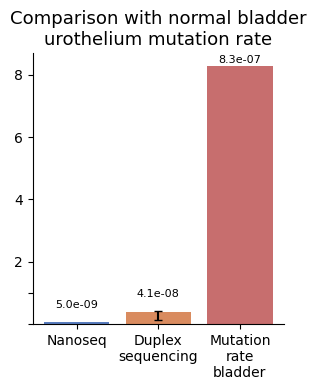

In [28]:
sampless_list = ['Nanoseq_Sanger', 'TwinStrand\nCord blood', "Bladder"]
sampless_list_names = ['Nanoseq', 'Duplex\nsequencing', "Mutation\nrate\nbladder"]

# Calculate error bars
data['yerr_low'] = data['mutrate_observed'] - data['mutrate_CI_low']
data['yerr_high'] = data['mutrate_CI_high'] - data['mutrate_observed']

# Sort by experiment for consistent plotting
data = data.sort_values('experiment')
print(data)
# Plot
plt.figure(figsize=(3, 4))
ax = sns.barplot(
    data=data,
    x='patient_id',
    y='mutrate_observed',
    hue='experiment',
    palette='muted',
    dodge=False,
    errorbar=None,
    order=sampless_list,
    hue_order = ["Nanoseq_Sanger", "TwinStrand", ", ", "BladderDNA_TwinStrand"]
)

# Add error bars manually
for idx, sample in enumerate(sampless_list):
    row = data[data["patient_id"] == sample].iloc[0, :]
    ax.errorbar(
        x=idx,
        y=row['mutrate_observed'],
        yerr=[[row['yerr_low']], [row['yerr_high']]],
        fmt='none',
        ecolor='black',
        capsize=3
    )

# Add mutation rate values above each bar
for idx, sample in enumerate(sampless_list):
    row = data[data["patient_id"] == sample].iloc[0, :]
    mutrate = row['mutrate_observed'] if sample != 'TwinStrand\nCord blood' else 4.1e-8
    ax.text(
        idx, 
        mutrate + 0.2e-8 if sample == "Bladder" else mutrate + 4e-8,  # adjust this offset to move the text higher or lower
        f'{mutrate:.1e}', 
        ha='center', 
        va='bottom', 
        fontsize=8, 
        color='black'
    )


    
# Set y-axis to scientific notation
formatter = ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-2, 2))
ax.yaxis.set_major_formatter(formatter)

# Remove top and right spines
sns.despine(ax=ax, left=False, top=True, right=True)

# Customize
ax.set_ylabel("")
ax.set_title("Comparison with normal bladder\nurothelium mutation rate", fontsize = 13)
ax.set_xlabel("", fontsize = 11)
ax.set_xticks(range(len(sampless_list)))
ax.set_xticklabels(sampless_list_names, fontsize = 10, rotation=0)
ax.set_yticks([x / 1e7 for x in [0, 1, 2, 4, 6, 8] ])
ax.set_yticklabels(['', '', '2', '4', '6', '8'])

# ax.set_ylim(0, 1e-7)
plt.tight_layout()
plt.legend(title="Duplex sequencing technology", frameon = False).remove()
plt.savefig("plots/ExtendedFig2a_right.png", dpi = 300)
plt.show()
